### 데이터 정제
- DataFrame, Series 내부의 데이터를 원하는 값으로 변경하는 작업
- 데이터를 변경하는 함수들을 공부하것도 중요하지만 변공하고자 하는 로우나 컬럼을 선택하는 방법도 매우 중요하다.
- 결측치처리, 이상치처리, 범위형데이터를 카테고리형으로 변환, 문자열을 숫자로 변환 등등....

### 결측치
- 데이터 수집 과정에서 오류 등의 원인으로 인해 측정되지 않은 값이 발생할 수 있다.
- 결측치 소거 : 결측치가 있는 행이나 열을 제거한다.
- 데이터의 왜곡이 발생하지는 않는다. 학습량이 줄어든다는 문제가 생긴다.
- 결측치 대체 : 학습량이 줄어들지는 않지만 데이터의 왜곡이 발생한다는 문제가 생긴다.

In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [3]:
df2 = df1.copy()

# 결측치 소거 - 결측치가 존재하는 컬럼이 하나라도 있는 로우를 모두 제거한다.
df2

df2.dropna(inplace=True)

df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [4]:
# 결측치 존재 여부를 확인할 컬럼을 지정할 수 있다.
df2 = df1.copy()

df2

# 수학, 과학컬럼에 결측치가있는 로우를 제거한다.
df2.dropna(subset=['수학', '과학'], inplace=True)

df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


In [5]:
# 모든 컬럼이 결측치로 되어 있는 로우를 찾아 삭제한다.
df2 = df1.copy()

df2.loc['길동'] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

df2

df2.dropna(how='all', inplace=True)

df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,NaN,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,NaN,NaN
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,NaN,88.0
길동,NaN,NaN,NaN,NaN,NaN,NaN


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1.0,남자,98.0,NaN,88.0,64.0
영희,2.0,여자,88.0,90.0,62.0,72.0
민수,1.0,남자,92.0,70.0,NaN,NaN
수현,3.0,여자,63.0,60.0,31.0,70.0
호영,4.0,남자,120.0,50.0,NaN,88.0


In [6]:
# 결측치가 있는 모든 컬럼을 제거한다.
df2 = df1.copy()

df2

df2.dropna(axis=1, inplace=True)

df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어
이름,,,
철수,1,남자,98
영희,2,여자,88
민수,1,남자,92
수현,3,여자,63
호영,4,남자,120


In [7]:
# 결측치 값 대체 - 특정 값으로 대체한다.
df2 = df1.copy()

df2

df2.fillna(50, inplace=True)

df2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,50.0,50.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,50.0,88.0


### 이상치
- 논리적인 의미 : 사회통념상 정해진 범위를 벗어난 값
- 통계적인 의미 : 극단치들은 이상치일 가능성이 있다.
- 극단치 : 상하위 0.3% 위치의 값이나 +-3 표준편차에 해당하는 값

In [8]:
df1 = pd.read_csv('data/grade.csv', encoding='euc-kr')
df1.set_index('이름', inplace=True)
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


In [9]:
# 이상치 존재여부를 확인한다(범위형 데이터)
# 범위형 데이터들의 최소와 최대를 확인한다.
df1[['국어', '영어', '수학', '과학']].agg(['min', 'max'])

,국어,영어,수학,과학
min,63,50.0,31.0,64.0
max,120,90.0,88.0,88.0


In [10]:
# 카테고리형 데이터. 
# value_counts : Series내에 저장되어 있는 값이 각각 몇 개인지 확인할 수 있다.
# 이를 통해 저장되어 있는 값의 종류를 확인하여 이상치를 확인한다
df1['학년'].value_counts().index
df1['성별'].value_counts().index

Int64Index([1, 2, 3, 4], dtype='int64')

Index(['남자', '여자'], dtype='object')

In [16]:
# 시각화 라이브러리
import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'

<AxesSubplot:>

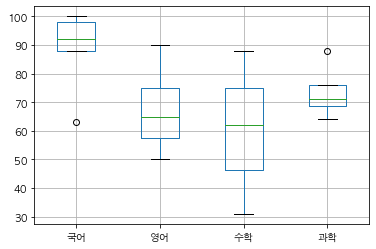

In [17]:
df1[['국어', '영어', '수학', '과학']].boxplot()
plt.show()

In [18]:
# 이상치 삭제.
# 이상치를 가지고 있는 데이터를 확인한다.
df1.query('국어 > 100')

,학년,성별,국어,영어,수학,과학
이름,,,,,,


In [19]:
# 이상치가 있는 행의 index 를 추출한다.
a1 = df1.query('국어 > 100').index
a1

Index([], dtype='object', name='이름')

In [20]:
# 값 대체
df1.loc[a1, '국어'] = 100
df1

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,100,50.0,NaN,88.0


In [21]:
# 제거
# 국어가 90점 이상이 이상치라고 가정한다.
# 국어가 90점 이상인 행의 인덱스를 추출한다.
a1 = df1.query('국어 >= 90').index
a1

df1.drop(a1, inplace=True)
df1

Index(['철수', '민수', '호영'], dtype='object', name='이름')

,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0
